In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

# base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

infected = pd.read_csv(infected_dataset_url)
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)
countries = pd.read_csv(countries_dataset_url)

print(len(infected))

infected.head()
#infected.tail(10)

266


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142


In [6]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Qinghai                         1
Reunion                         1
New Caledonia                   1
Mayotte                         1
                               ..
Guizhou                         1
Guangxi                         1
Guangdong                       1
Gansu                           1
Saint Pierre and Miquelon       1
Name: Province/State, Length: 81, dtype: int64

In [5]:
infected[infected['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,594,594,594,594,594,595,601,637,673,700
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,580,582,582
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,359,359,359,359,360,361,361,361,362,362
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,139
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1602,1602,1604,1604,1607,1607,1608,1625,1625,1628
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,170,170,170,170,170,170,171,171,171,171
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,328,328,328,328,328,328,328,328,331,335


In [7]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

print(len(infected))
infected.head()

188


/tmp/ipykernel_4743/1966288345.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  infected = infected.groupby('Country/Region').sum()
/tmp/ipykernel_4743/1966288345.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  recovered = recovered.groupby('Country/Region').sum()
/tmp/ipykernel_4743/1966288345.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deaths = deaths.groupby('Country/Region').sum()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142


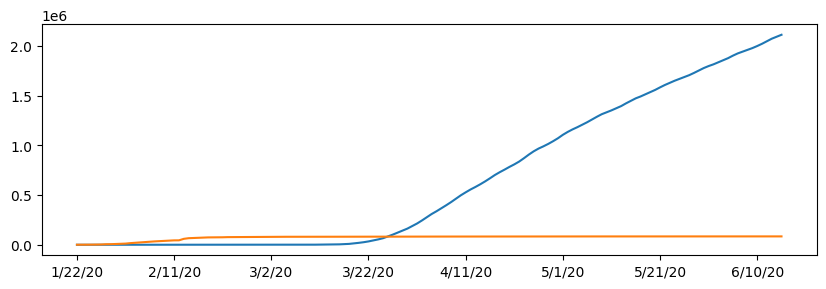

In [8]:
infected.loc['US'][2:].plot()
infected.loc['China'][2:].plot()
plt.show()

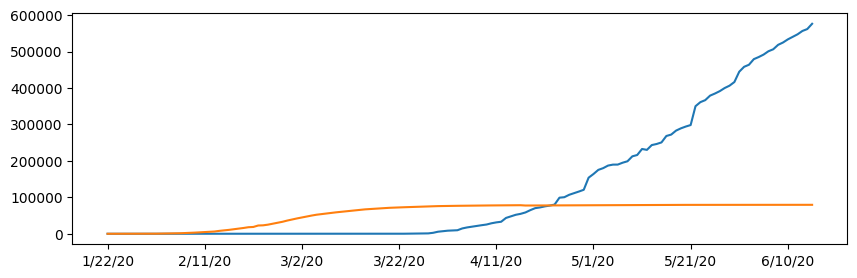

In [9]:
recovered.loc['US'][2:].plot()
recovered.loc['China'][2:].plot()
plt.show()

In [11]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)


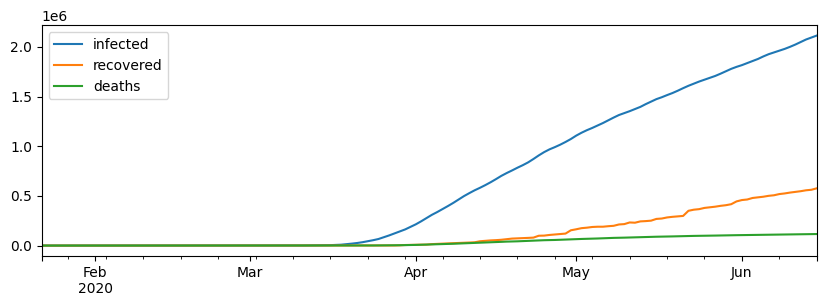

In [80]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df.plot()
plt.show()

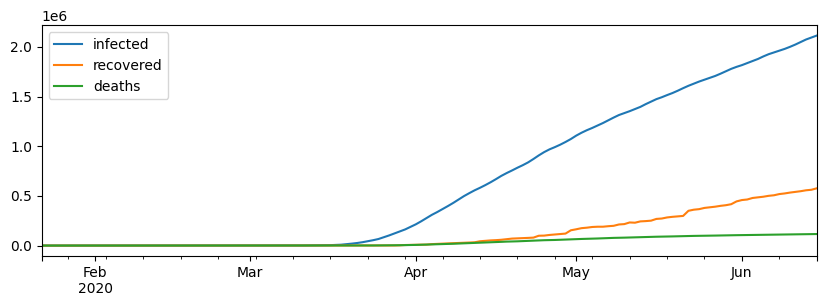

In [13]:
df.plot()
plt.show()

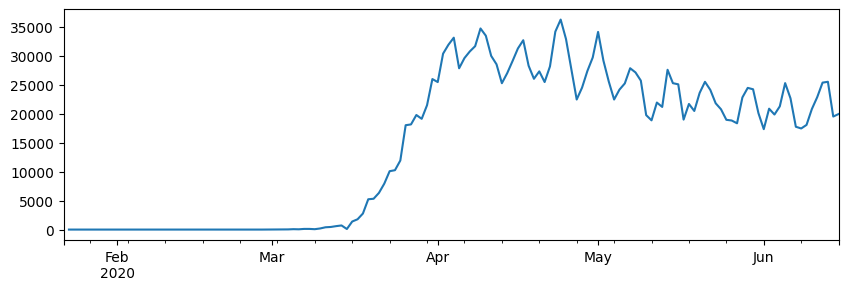

In [64]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

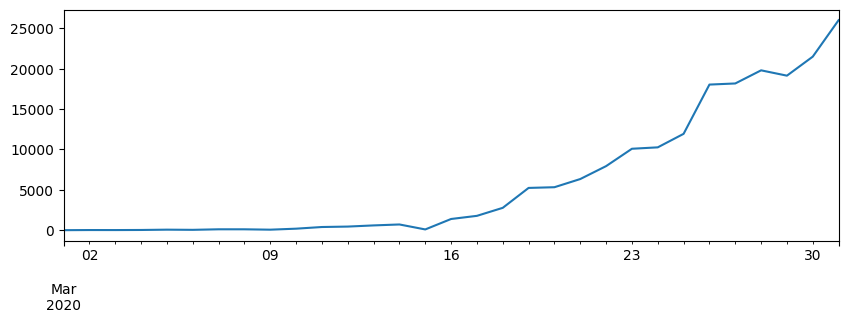

In [65]:
df[(df.index.year==2020) & (df.index.month==3)]['ninfected'].plot()
plt.show()

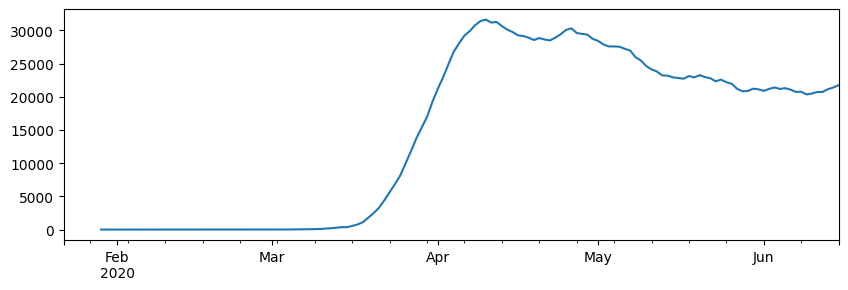

In [66]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

In [67]:
countries = pd.read_csv(countries_dataset_url)
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.202700,17.873900,Angola,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4016,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4017,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4018,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4019,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [68]:
# countries = countries.groupby('Country_Region').sum()
# countries.iloc[150:200]
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
# countries['Province_State'][countries['Country_Region']=='US']

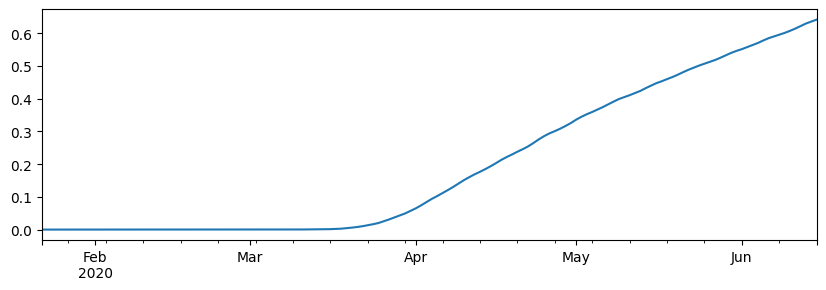

In [69]:
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot()
plt.show()

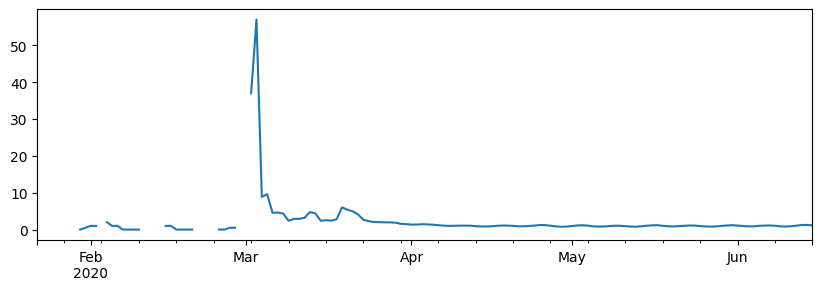

In [70]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

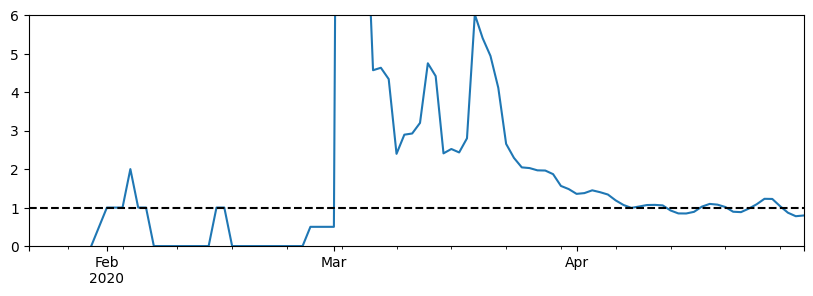

In [71]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='black')
plt.show()

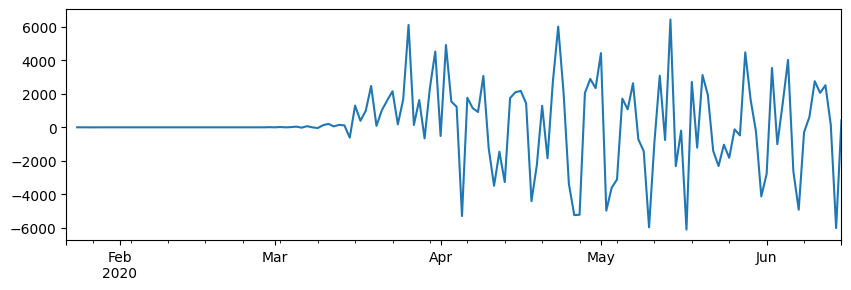

In [72]:
df['ninfected'].diff().plot()
plt.show()

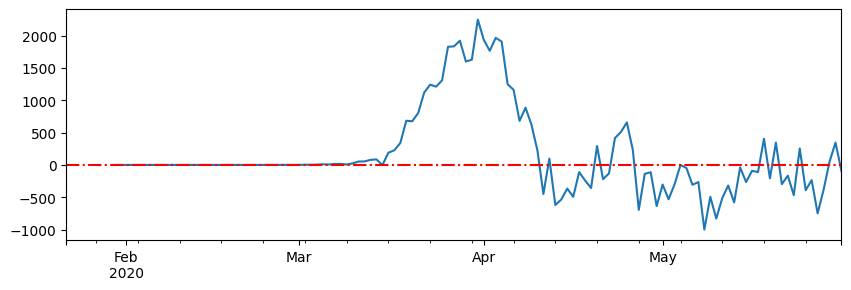

In [73]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

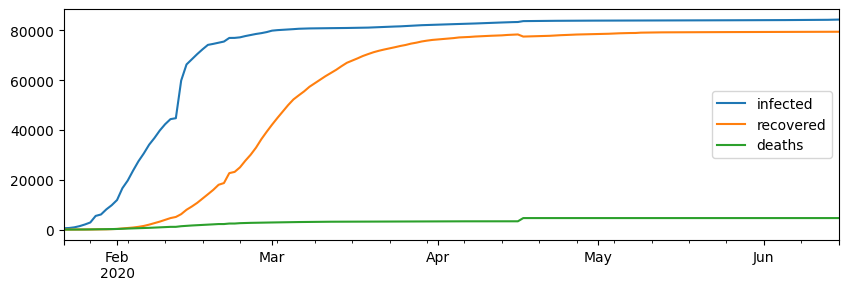

In [78]:
df_china = mkframe('China')
df_china.plot()
plt.show()

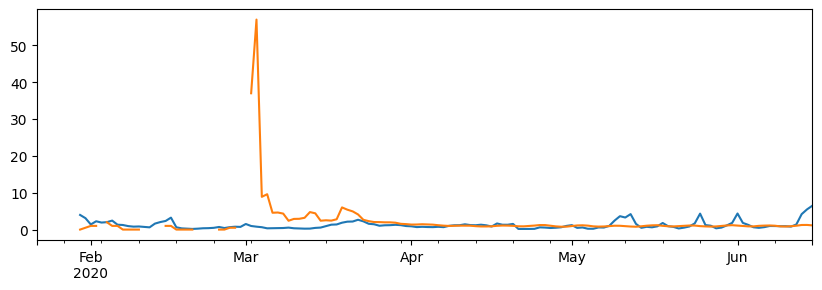

In [75]:
df_china['ninfected'] = df_china['infected'].diff()
df_china['Rt'] = df_china['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df_china['Rt'].plot()
df['Rt'].plot()
plt.show()

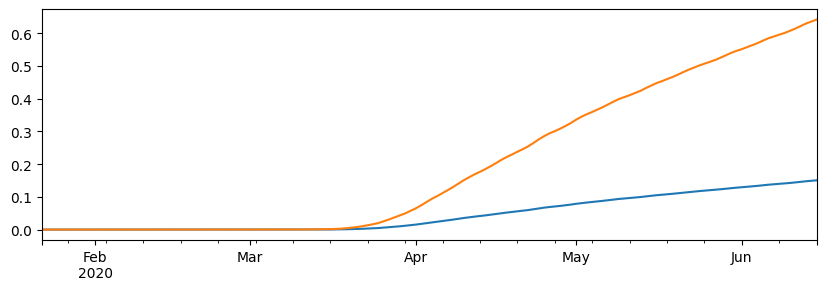

In [47]:
pop = countries[(countries['Country_Region']=='China') & countries['Province_State'].isna()]['Population'].iloc[0]
df_china['pinfected'] = df['infected']*100 / pop
df_china['pinfected'].plot()
df['pinfected'].plot()
plt.show()

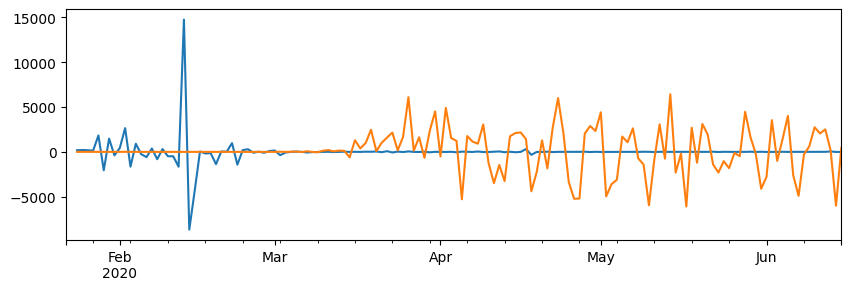

In [76]:
df_china['ninfected'] = df_china['ninfected'].diff()
df_china['ninfected'].plot()
df['ninfected'].diff().plot()
plt.show()

In [56]:
df_china

,infected,recovered,deaths,ninfected,Rt
2020-01-22,548,28,17,NaN,NaN
2020-01-23,643,30,18,NaN,NaN
2020-01-24,920,36,26,NaN,NaN
2020-01-25,1406,39,42,27.0,NaN
2020-01-26,2075,49,56,-26.0,NaN
...,...,...,...,...,...
2020-06-11,84216,79464,4638,-12.0,0.806452
2020-06-12,84228,79472,4638,9.0,1.375000
2020-06-13,84286,79475,4638,41.0,4.190476
2020-06-14,84335,79482,4638,-55.0,5.478261
